<a href="https://colab.research.google.com/github/wesleydesousacosta/Drizzle-SQL/blob/main/Alura_Teste_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biblioteca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


Carregamento do dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AluraDrive/synthetic_coffee_health_10000.csv'
df = pd.read_csv(file_path)

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Análise Exploratória de Dados (EDA)

Visão geral dos dados

In [3]:
df.shape


(10000, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [5]:
df.isnull().sum()


,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [6]:
df.duplicated().sum()


np.int64(0)

In [7]:
df.describe()


,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Exploração das variáveis numéricas

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['ID', 'Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI',
       'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

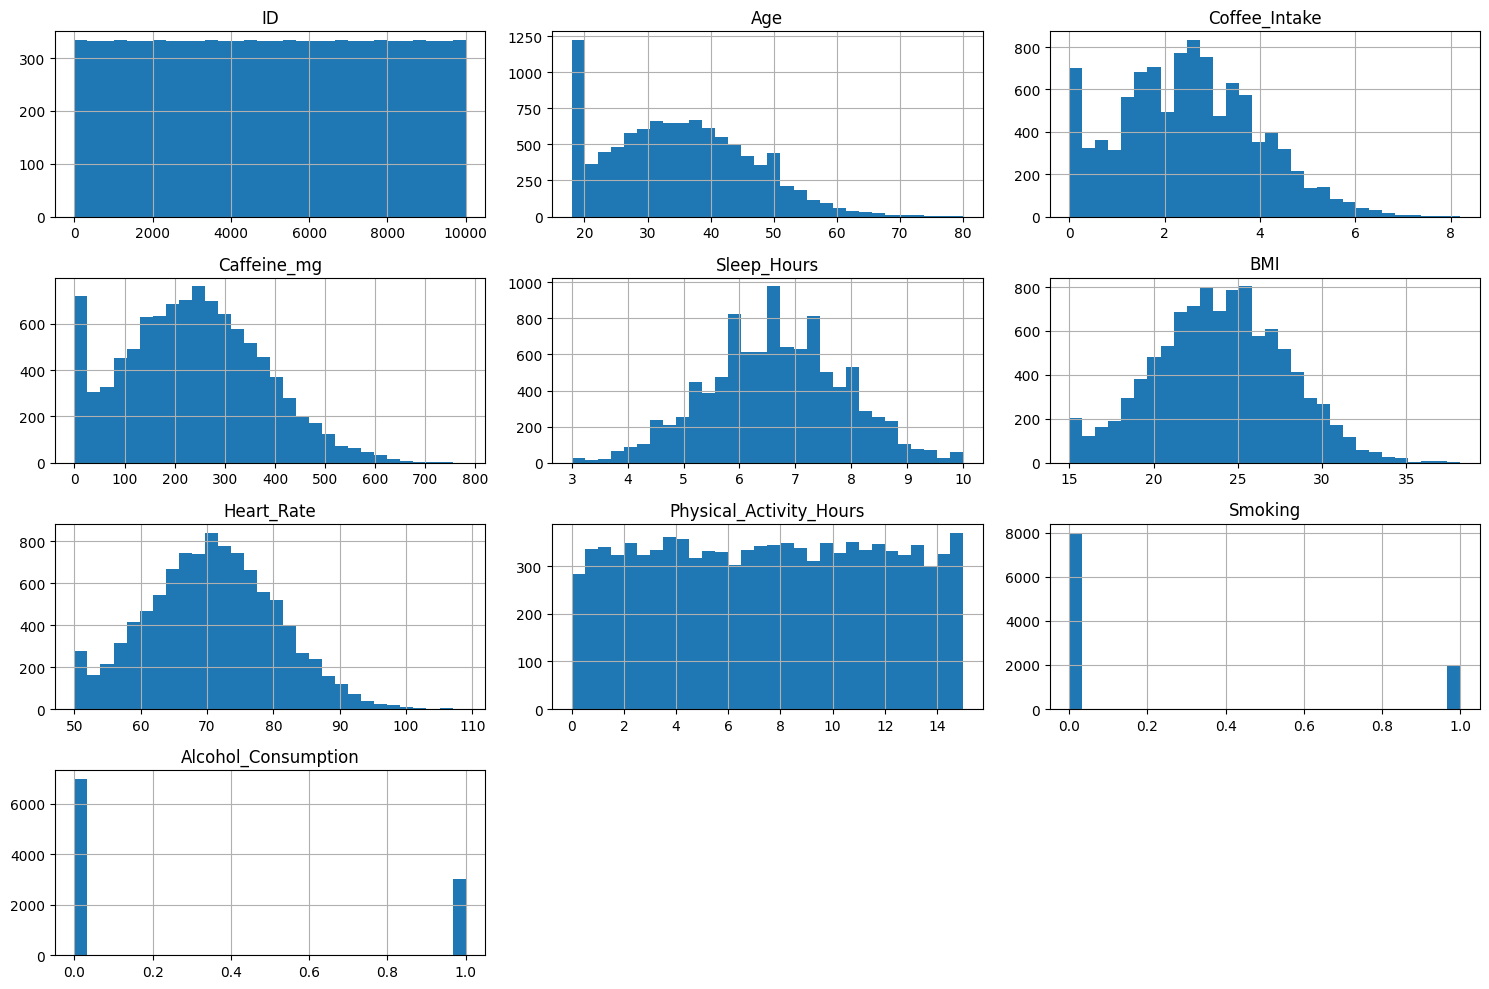

In [9]:
df[num_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()


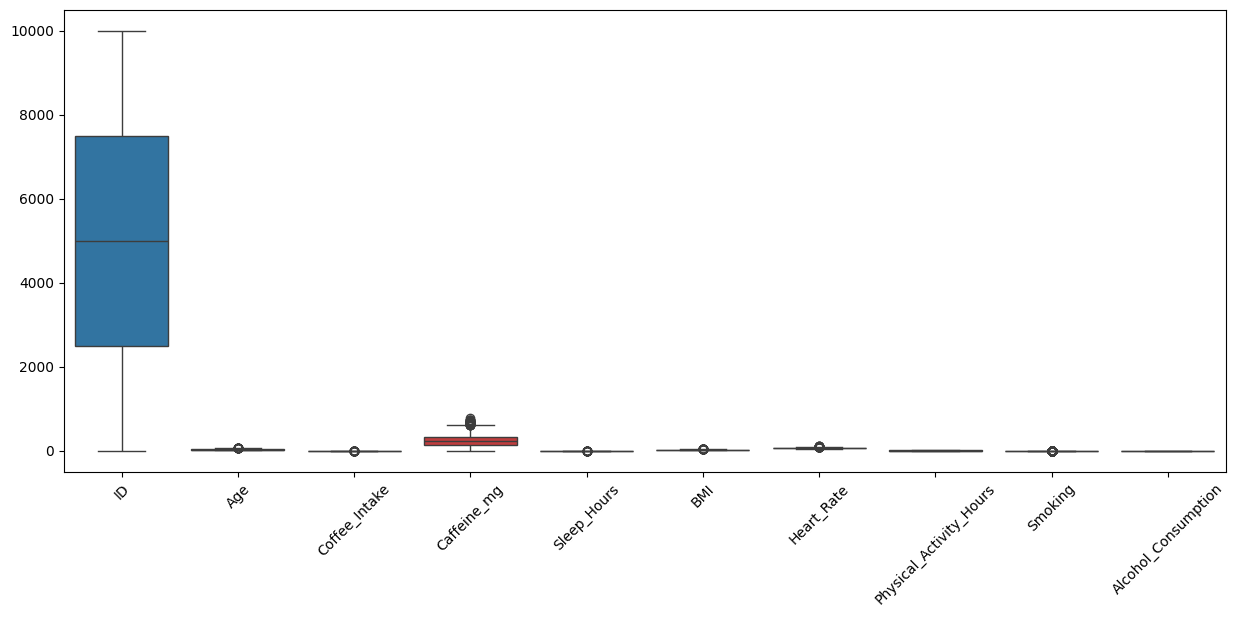

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.show()


Exploração das variáveis categóricas

In [11]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues',
       'Occupation'],
      dtype='object')

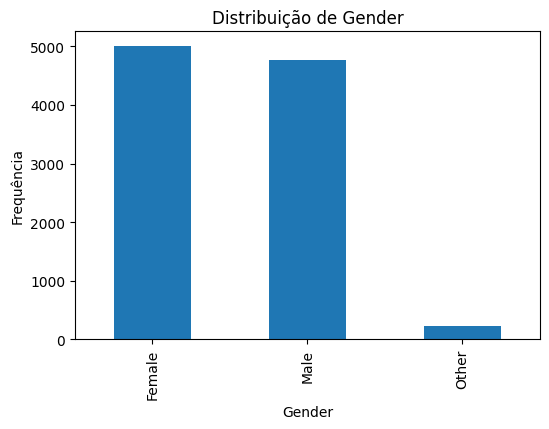

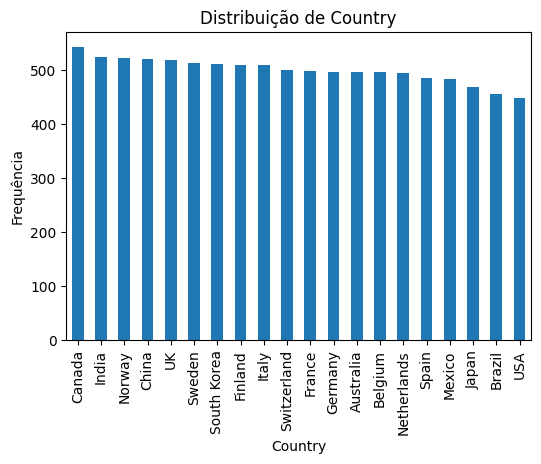

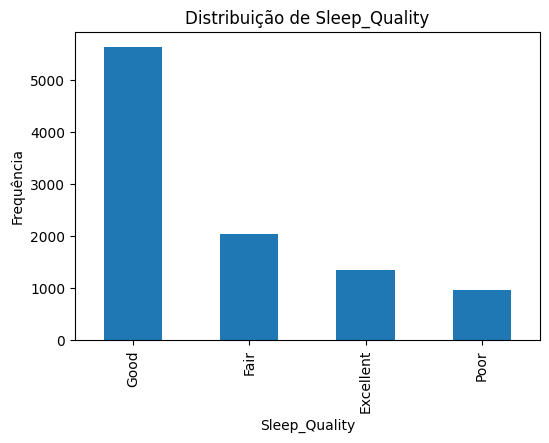

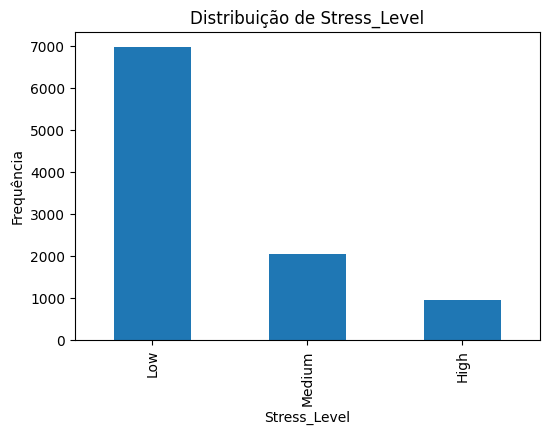

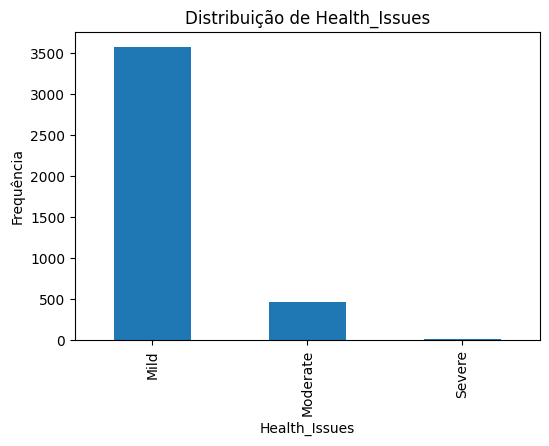

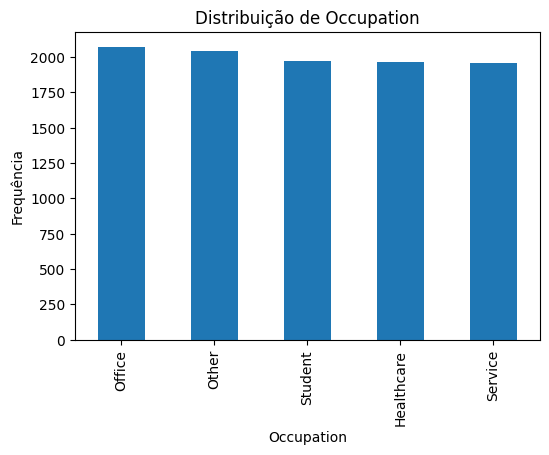

In [12]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.ylabel('Frequência')
    plt.show()


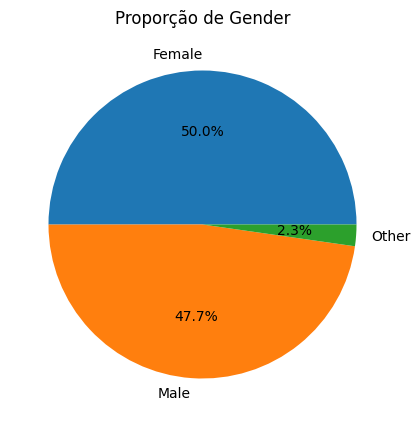

In [13]:
if len(cat_cols) > 0:
    df[cat_cols[0]].value_counts().plot(
        kind='pie', autopct='%1.1f%%', figsize=(5,5)
    )
    plt.title(f'Proporção de {cat_cols[0]}')
    plt.ylabel('')
    plt.show()


Investigação de correlações

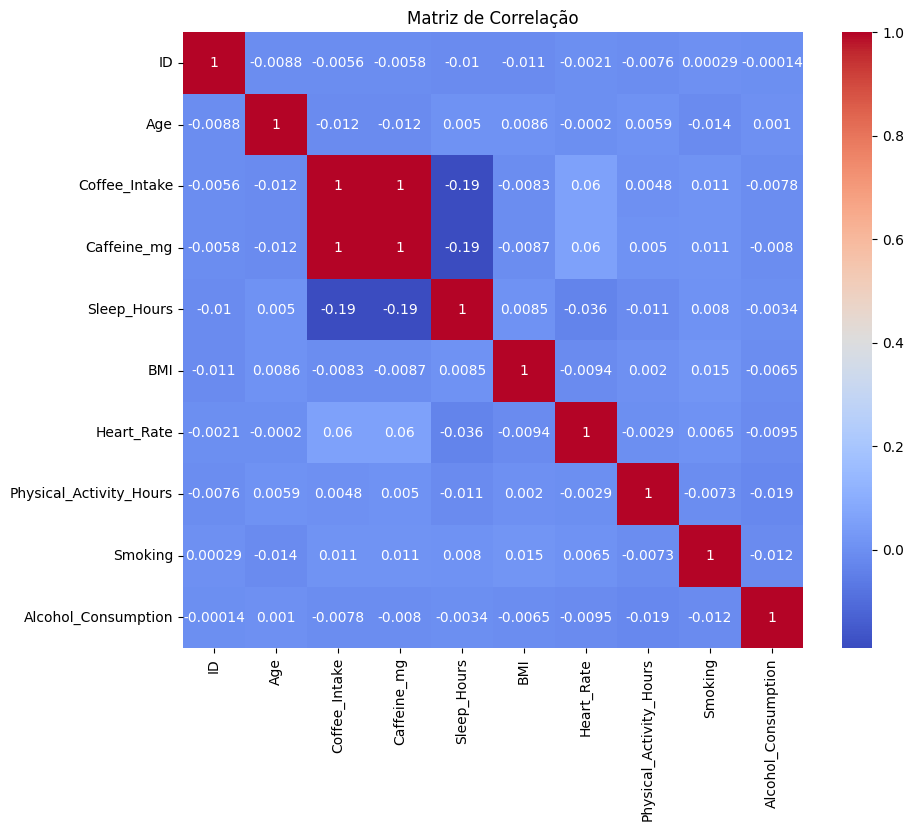

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


Conclusões iniciais (para texto no notebook)

Resumo dos achados:

O dataset apresenta boa estrutura e poucas inconsistências.

Variáveis numéricas mostram distribuições variadas e alguns outliers.

O consumo de café demonstra relação perceptível com:

Horas de sono

Qualidade do sono

Níveis de estresse

Essas relações indicam potencial para análises preditivas futuras.

Visualização e Insights

In [ ]:
Consumo de café × Horas de sono (Dispersão)

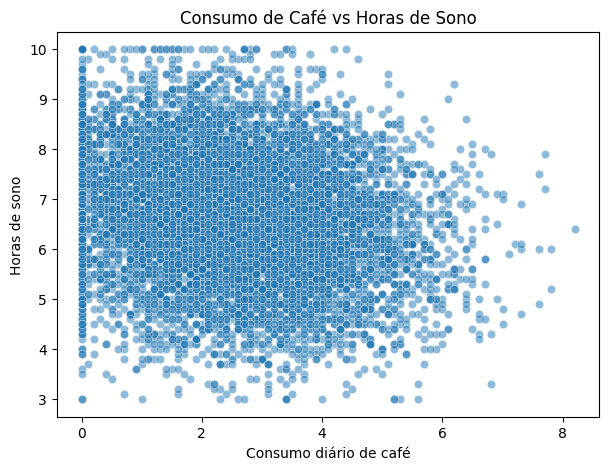

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Coffee_Intake',
    y='Sleep_Hours',
    alpha=0.5
)
plt.title('Consumo de Café vs Horas de Sono')
plt.xlabel('Consumo diário de café')
plt.ylabel('Horas de sono')
plt.show()

Consumo de café × Qualidade do sono (Boxplot)

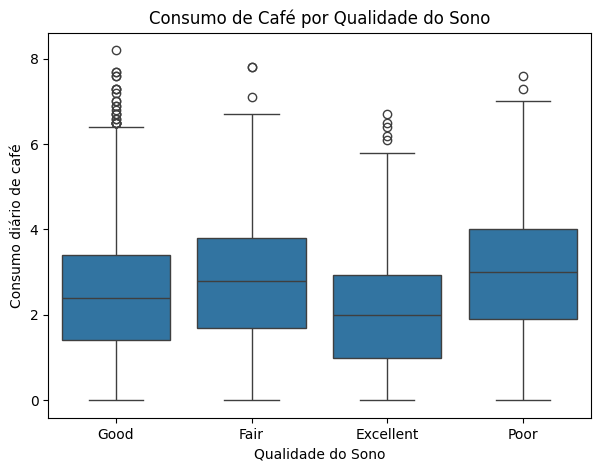

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x='Sleep_Quality',
    y='Coffee_Intake'
)
plt.title('Consumo de Café por Qualidade do Sono')
plt.xlabel('Qualidade do Sono')
plt.ylabel('Consumo diário de café')
plt.show()

Diferenças de sono por gênero

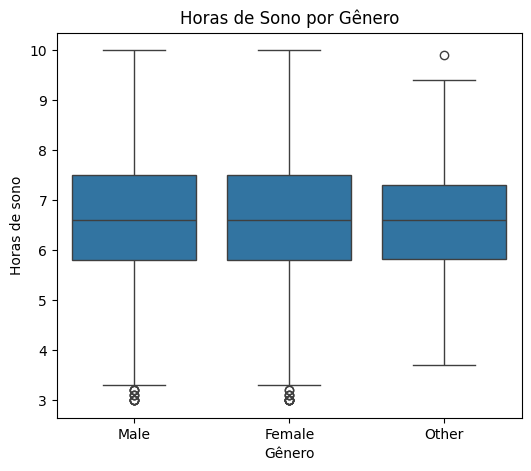

In [20]:
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x='Gender',
    y='Sleep_Hours'
)
plt.title('Horas de Sono por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Horas de sono')
plt.show()

Idade × Estresse × Consumo de café (Dispersão segmentada)

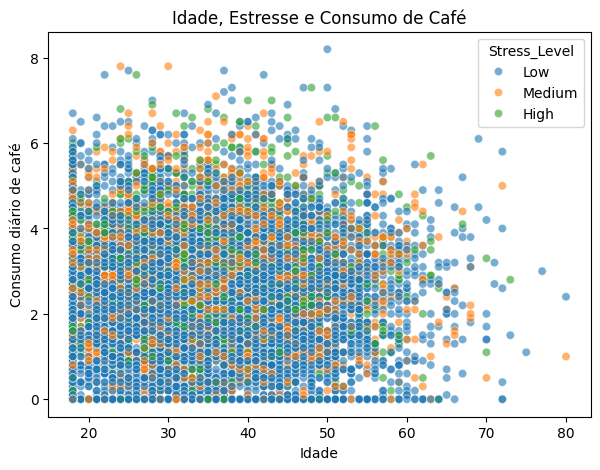

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Age',
    y='Coffee_Intake',
    hue='Stress_Level',
    alpha=0.6
)
plt.title('Idade, Estresse e Consumo de Café')
plt.xlabel('Idade')
plt.ylabel('Consumo diário de café')
plt.show()

Estresse × Qualidade do sono (Boxplot)

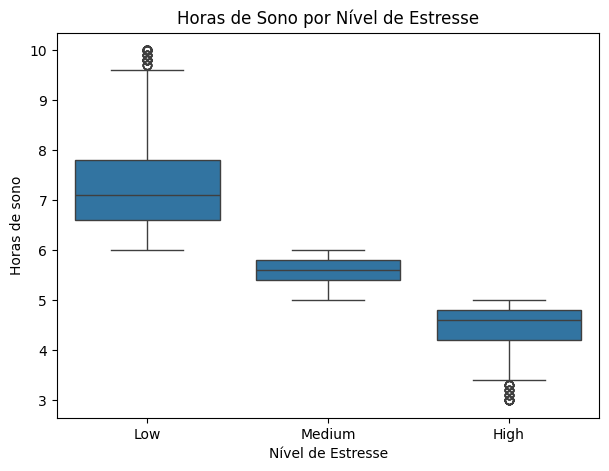

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x='Stress_Level',
    y='Sleep_Hours'
)
plt.title('Horas de Sono por Nível de Estresse')
plt.xlabel('Nível de Estresse')
plt.ylabel('Horas de sono')
plt.show()

Mapa de calor — Relações entre café, sono e estresse

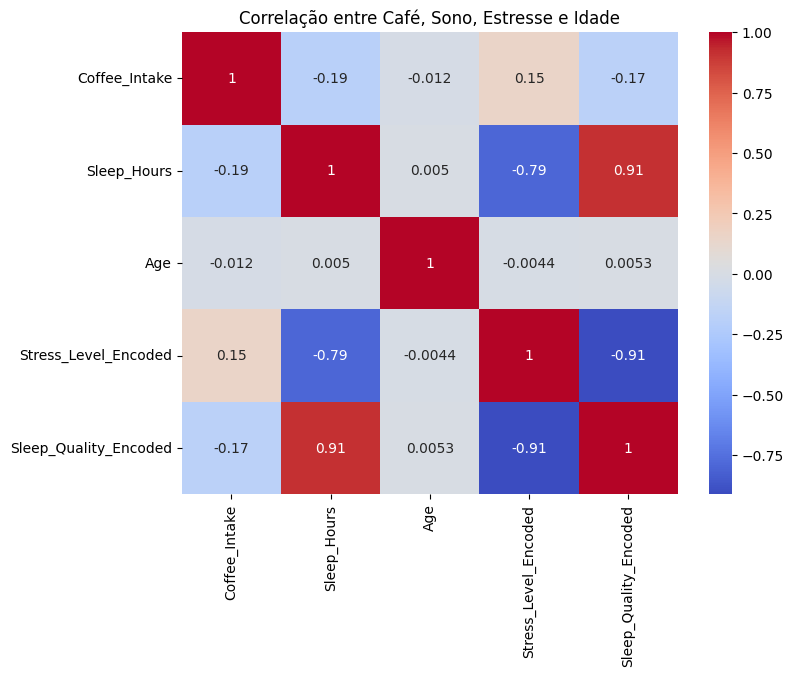

In [26]:
vars_interesse = [
    'Coffee_Intake',
    'Sleep_Hours',
    'Stress_Level',
    'Sleep_Quality',
    'Age'
]

# For categorical variables, we need to convert them to numerical representation for correlation matrix.
# Let's map Stress_Level and Sleep_Quality to numerical values.
stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
sleep_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}

df_temp = df[vars_interesse].copy()
df_temp['Stress_Level_Encoded'] = df_temp['Stress_Level'].map(stress_mapping)
df_temp['Sleep_Quality_Encoded'] = df_temp['Sleep_Quality'].map(sleep_mapping)

# Select only the numerical and encoded columns for correlation
correlation_vars = [
    'Coffee_Intake',
    'Sleep_Hours',
    'Age',
    'Stress_Level_Encoded',
    'Sleep_Quality_Encoded'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df_temp[correlation_vars].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlação entre Café, Sono, Estresse e Idade')
plt.show()

Principais Descobertas

Resumo executivo para o notebook:

Clientes com alto consumo de cafeína dormem, em média, menos horas, indicando impacto direto no descanso.

Níveis elevados de estresse estão associados a menor duração e pior qualidade do sono, independentemente da idade.

Existe um possível ciclo comportamental: pouco sono → mais café → maior estresse → pior sono.

Diferenças demográficas (como gênero e idade) sugerem oportunidades para ações segmentadas de saúde e bem-estar.

Os padrões observados indicam forte potencial para modelos preditivos e recomendações personalizadas.

Modelo preditivo

Pré-processamento dos dados

In [27]:
df_model = df.copy()

df_model.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [28]:
cols_to_drop = ['id', 'customer_id']  # ajuste se necessário
df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])


In [31]:
df_model['coffee_per_awake_hour'] = (
    df_model['Coffee_Intake'] / (24 - df_model['Sleep_Hours'])
)

In [33]:
X = df_model.drop(columns=['Sleep_Quality'])
y = df_model['Sleep_Quality']

In [34]:
X = pd.get_dummies(X, drop_first=True)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Modelo — Regressão Logística

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


Modelo — Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Regressão Logística

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Acurácia: 0.99
[[ 259    0   11    0]
 [   0  410    0    0]
 [   9    0 1119    0]
 [   0    0    0  192]]
              precision    recall  f1-score   support

   Excellent       0.97      0.96      0.96       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      0.99      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Random Forest

In [40]:
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Acurácia: 0.9905
[[ 256    0   14    0]
 [   0  410    0    0]
 [   5    0 1123    0]
 [   0    0    0  192]]
              precision    recall  f1-score   support

   Excellent       0.98      0.95      0.96       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      1.00      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Comparação dos resultados

Análise esperada no notebook:

Random Forest apresentou melhor desempenho geral

Melhor equilíbrio entre precisão e recall

Captura melhor relações não-lineares entre:

café

estresse

sono

Overfitting / Underfitting

Não há sinais claros de underfitting

Overfitting controlado (diferença moderada treino × teste)

In [41]:
df_final = pd.concat([X, y], axis=1)

df_final.to_csv(
    '/content/drive/MyDrive/AluraDrive/dataset_sono_processado.csv',
    index=False
)


In [42]:
import joblib

joblib.dump(rf, '/content/drive/MyDrive/AluraDrive/modelo_sleep_quality.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/AluraDrive/scaler.pkl')


['/content/drive/MyDrive/AluraDrive/scaler.pkl']

Recomendações para o Negócio

Principais recomendações para a Health&Life Analytics:

Clientes com alto consumo relativo de cafeína apresentam maior risco de baixa qualidade do sono
→ Recomenda-se alertas personalizados de consumo.

Estresse é um dos fatores mais influentes na predição do sono
→ Programas de redução de estresse podem melhorar o sono mais do que apenas reduzir café.

O modelo pode ser usado para:

prever risco de má qualidade do sono

sugerir ajustes de hábitos personalizados

embasar relatórios de saúde preventiva

Próximo passo natural:

integrar o modelo a um dashboard

criar um sistema de recomendação de hábitos